# New Section

In [2]:
import numpy as np
import matplotlib.pyplot as plt # used to plot fig
import seaborn as sns # used to plot fig as
from mlxtend.plotting import plot_confusion_matrix  # used to draw confusion matrix
import os  # This is used to read files to indict floders in the operating system
import cv2 # cv2 is used in opencv and deeplearning foe images transform, flip, change color and so on..

from sklearn.model_selection import train_test_split # this is used in Machine learning so i used it to split the train and test file 80/20 respectively
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix. 
from sklearn.preprocessing import LabelBinarizer  #Fit label binarizer and transform multi-class labels to binary labels
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
Data = np.load("/content/drive/MyDrive/Face Mask/FData_Facemask1.npy")
Labels = np.load("/content/drive/MyDrive/Face Mask/FLabels_FaceMask1.npy")

In [4]:
Data = Data/255.0

In [5]:
labelb = LabelBinarizer()
Lables = labelb.fit_transform(Labels)
Labels = to_categorical(Labels) 

In [6]:
(trainX, testX, trainY, testY) = train_test_split(Data, Labels, train_size=0.8, stratify = Labels, random_state =42)

In [7]:
train_datagen = ImageDataGenerator(rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.05,
                                   shear_range = 0.2,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   vertical_flip = False,
                                   fill_mode = "nearest")

In [8]:
from tensorflow.keras.applications import MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [10]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")

[INFO] compiling model...
[INFO] training head...


In [11]:
his = model.fit_generator(
    train_datagen.flow(trainX, trainY, batch_size= BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
95/95 [==============================] - 32s 306ms/step - loss: 0.6238 - accuracy: 0.6992 - val_loss: 0.1827 - val_accuracy: 0.9659
Epoch 2/20
95/95 [==============================] - 28s 293ms/step - loss: 0.2237 - accuracy: 0.9452 - val_loss: 0.0886 - val_accuracy: 0.9803
Epoch 3/20
95/95 [==============================] - 28s 296ms/step - loss: 0.1407 - accuracy: 0.9554 - val_loss: 0.0633 - val_accuracy: 0.9829
Epoch 4/20
95/95 [==============================] - 28s 293ms/step - loss: 0.1008 - accuracy: 0.9698 - val_loss: 0.0509 - val_accuracy: 0.9829
Epoch 5/20
95/95 [==============================] - 28s 293ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0448 - val_accuracy: 0.9843
Epoch 6/20
95/95 [==============================] - 28s 293ms/step - loss: 0.0858 - accuracy: 0.9708 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 7/20
95/95 [==============================] - 28s 295ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.0329 - val_accuracy: 0.9895

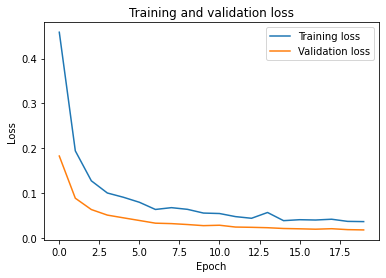

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(his.history["loss"], label='Training loss')
plt.plot(his.history["val_loss"], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/Face Mask/Training and validation loss.png")

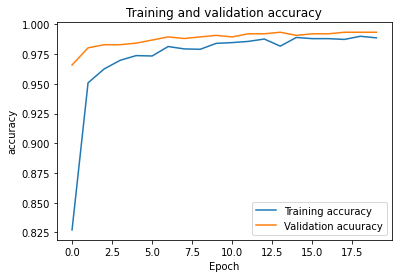

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(his.history["accuracy"], label='Training accuracy')
plt.plot(his.history["val_accuracy"], label='Validation acuuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/Face Mask/Training and validation loss.png")

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict(testX, batch_size=BS)
predict = np.argmax(predict, axis=1)
print(classification_report(testY.argmax(axis=1), predict, labels=labelb.classes_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       379
           1       0.99      0.99      0.99       383

    accuracy                           0.99       762
   macro avg       0.99      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d1a5ef7b8>)

<Figure size 432x288 with 0 Axes>

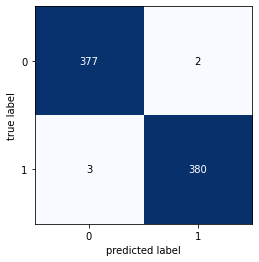

In [16]:
cm = confusion_matrix(testY.argmax(axis=1), predict, labels=labelb.classes_)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm)

In [17]:
model.save('/content/drive/MyDrive/Face Mask/my_model.h5')